In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"E:\data course\6-Python\Week03\DT - RF - XGBoost\train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [5]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [6]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [7]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [8]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
# ApplicantIncome outliers
l_ApplicantIncome=2877.5-1.5*(5795.00-2877.5)
u_ApplicantIncome=5795.00+1.5*(5795.00-2877.5)
print(l_ApplicantIncome,u_ApplicantIncome)

-1498.75 10171.25


In [10]:
df[(df['ApplicantIncome']<-1498.75)|(df['ApplicantIncome']>10171.25)].shape

(50, 13)

In [11]:
#df['ApplicantIncome'].replace((df['ApplicantIncome']>10171.25),10171.25) 
df.loc[df['ApplicantIncome'] > 10171.25, 'ApplicantIncome'] = 10171.25   #coercing


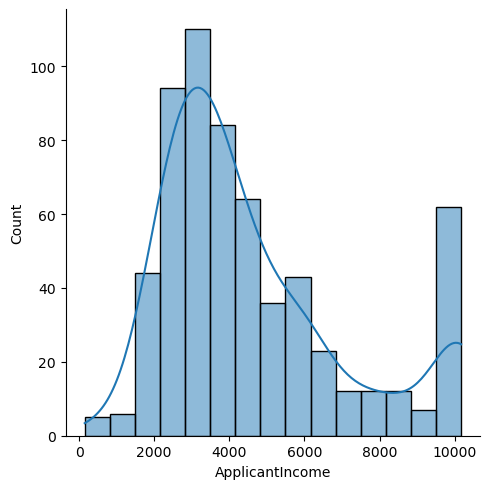

In [12]:
sns.displot(data=df,x='ApplicantIncome',kde=True)

In [13]:
# CoapplicantIncome outliers
l_CoapplicantIncome=0.0-1.5*(2297.25-0)
u_CoapplicantIncome=2297.25+1.5*(2297.25-0)
print(l_CoapplicantIncome,u_CoapplicantIncome)

-3445.875 5743.125


In [14]:
df[(df['CoapplicantIncome']<-3445.875)|(df['CoapplicantIncome']>5743.125)].shape

(18, 13)

In [15]:
df.loc[df['CoapplicantIncome'] > 5743.125, 'CoapplicantIncome'] = 5743.125    #coercing


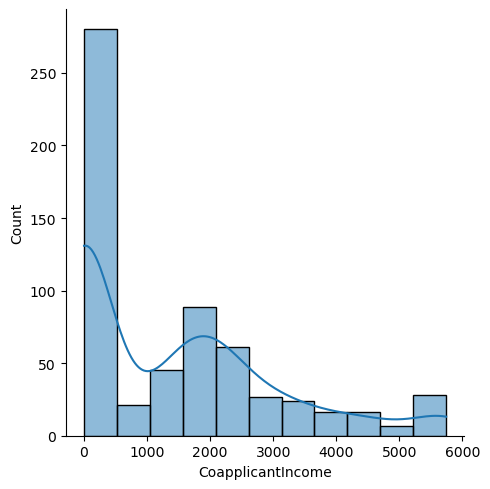

In [16]:
sns.displot(data=df,x='CoapplicantIncome',kde=True)

In [17]:
# LoanAmount outliers
l_LoanAmount=100-1.5*(168-100)
u_LoanAmount=168+1.5*(168-100)
print(l_LoanAmount,u_LoanAmount)

-2.0 270.0


In [18]:
df[(df['LoanAmount']<-2)|(df['LoanAmount']>270)].shape

(39, 13)

In [19]:
df.loc[df['LoanAmount'] > 270, 'LoanAmount'] = 300    #coercing

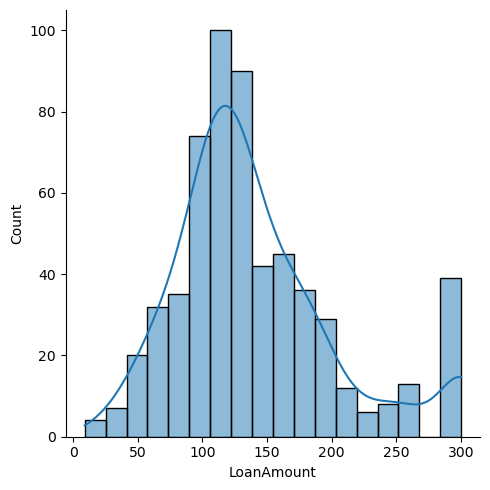

In [20]:
sns.displot(data=df,x='LoanAmount',kde=True)

In [21]:
# Data Preprocessing and null values imputation
# Label Encoding
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',3,inplace=True)
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 62.5+ KB


In [23]:
# Missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
df[rev_null]=df[rev_null].replace({np.nan:df['Gender'].mode(),
                                   np.nan:df['Married'].mode(),
                                   np.nan:df['Dependents'].mode(),
                                   np.nan:df['Self_Employed'].mode(),
                                   np.nan:df['Credit_History'].mode(),
                                   np.nan:df['LoanAmount'].mean(),
                                   np.nan:df['Loan_Amount_Term'].mean()})

In [25]:
df.isnull().sum().sum()

0

In [26]:
# Splitting traing data
X=df.drop(columns=['Loan_ID','Loan_Status']).values
y=df['Loan_Status'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [28]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[-0.15275703, -0.02337029, -0.13240378, ...,  0.30785991,
        -0.28968484,  0.12313205],
       [-0.15275703, -0.08623775, -0.17075752, ...,  0.30785991,
        -0.28968484,  1.3544526 ],
       [-0.15275703, -0.02337029, -0.11322691, ..., -4.12593972,
        -0.28968484,  0.12313205],
       ...,
       [-0.17194027, -0.08623775, -0.17075752, ...,  0.30785991,
        -0.28968484,  0.12313205],
       [-0.17194027, 21.41443147,  6.38773202, ..., -1.46565994,
        -0.28968484, -1.10818849],
       [-0.15275703, -0.02337029,  6.38773202, ...,  0.30785991,
        -0.28968484,  0.12313205]])

In [30]:
X_test

array([[-0.15275703, -0.02337029, -0.17075752, ...,  0.30785991,
        -0.28968484, -1.10818849],
       [-0.15275703, -0.02337029, -0.17075752, ...,  0.30785991,
         3.43185195, -1.10818849],
       [-0.15275703, -0.02337029, -0.13240378, ...,  0.30785991,
        -0.28968484,  1.3544526 ],
       ...,
       [-0.17194027, -0.02337029, -0.17075752, ...,  0.30785991,
        -0.28968484, -1.10818849],
       [-0.15275703, -0.02337029, -0.13240378, ...,  0.30785991,
        -0.30059844, -1.10818849],
       [-0.15275703, -0.08623775, -0.17075752, ...,  2.08137977,
        -0.28968484,  0.12313205]])

In [31]:
# Random Forest Classifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20,criterion = 'entropy', random_state = 12)
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,rfc_pred_train))

# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Training Set Evaluation F1-Score=> 0.9968944099378882
Testing Set Evaluation F1-Score=> 0.8378378378378378


In [33]:
rfc.feature_importances_

array([0.03209699, 0.02643   , 0.05571826, 0.01965859, 0.02202525,
       0.19111865, 0.10163779, 0.19317602, 0.05222347, 0.25066297,
       0.05525202])

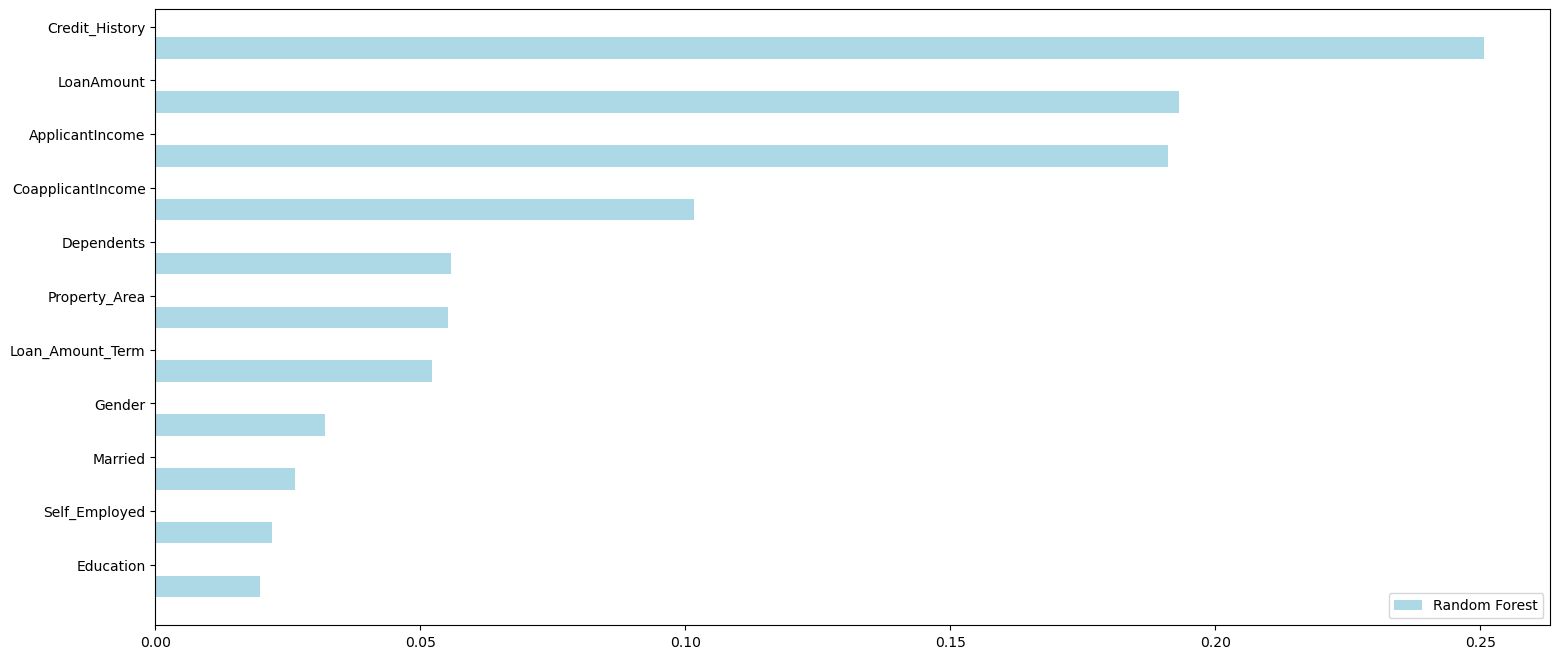

In [34]:
# feature importance figure
feature_importance=pd.DataFrame({'rfc':rfc.feature_importances_},index=df.drop(columns=['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='lightblue',label='Random Forest')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()